### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figsize=(6,8)


### Importing Data set into Data Frame

In [ ]:
df = pd.read_csv('Dataset.csv')
df.head()

,ID,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center,Neighborhood,Furnished,Building_Type,Rental_Price
0,1,692,1,2,2.07,Uptown,Furnished,Apartment,5035.497680
1,2,622,3,1,10.85,Suburbs,Unfurnished,Condo,4316.686202
2,3,559,0,1,10.55,Downtown,Furnished,Studio,2211.047997
3,4,307,0,1,7.37,Uptown,Furnished,Studio,2330.542651
4,5,1097,3,2,7.41,uptown,Unfurnished,Apartment,5272.940908


Get the table information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       252 non-null    int64  
 1   Size_in_Sqft             252 non-null    int64  
 2   Bedrooms                 252 non-null    object 
 3   Bathrooms                252 non-null    int64  
 4   Distance_to_City_Center  252 non-null    float64
 5   Neighborhood             252 non-null    object 
 6   Furnished                252 non-null    object 
 7   Building_Type            252 non-null    object 
 8   Rental_Price             252 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 17.8+ KB


In [ ]:
columns = df.columns
print(columns)

Index(['ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center', 'Neighborhood', 'Furnished', 'Building_Type',
       'Rental_Price'],
      dtype='object')


Get the No of Rows and Columns

In [ ]:
df.shape

(252, 9)

Checking Null Values

In [ ]:
df.isnull().sum()

,0
ID,0
Size_in_Sqft,0
Bedrooms,0
Bathrooms,0
Distance_to_City_Center,0
Neighborhood,0
Furnished,0
Building_Type,0
Rental_Price,0


Checking Duplicates

In [ ]:
df.duplicated().sum()

2

Remove Duplicates Values

In [ ]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

0

Remove unwanted Columns

In [ ]:
df1.drop("ID",axis=1,inplace=True)

Get Summary Statistics

In [ ]:
df1.describe()

,Size_in_Sqft,Bathrooms,Distance_to_City_Center,Rental_Price
count,250.00000,250.000000,250.000000,250.000000
mean,800.96800,1.260000,6.553960,4079.354811
std,302.51014,0.439514,3.408565,2052.215140
min,301.00000,1.000000,0.570000,804.814268
25%,559.00000,1.000000,3.490000,2426.135694
50%,802.00000,1.000000,7.020000,3938.417295
75%,1023.50000,2.000000,9.577500,5254.257837
max,1497.00000,2.000000,11.980000,13179.276580


In [ ]:
df1["Bathrooms"].value_counts()

,count
Bathrooms,
1,185
2,65


Converting Bathrooms Columns Into Categorical Variables Due it is Discrete

In [ ]:
df1['Bathrooms'] = pd.Categorical(df1['Bathrooms'], ordered=True)

Get the Categorical Variable Information

In [ ]:
df1.describe(include=['object','category'])

,Bedrooms,Bathrooms,Neighborhood,Furnished,Building_Type
count,250,250,250,250,250
unique,6,2,6,4,5
top,1,1,Midtown,Furnished,Condo
freq,91,185,65,167,88


Get both Quantitative and Qualitative Variables Unique Counts

In [ ]:
for i in df1.columns:
    print('There are',df1[i].nunique(),'unique value','in :',i)

There are 226 unique value in : Size_in_Sqft
There are 6 unique value in : Bedrooms
There are 2 unique value in : Bathrooms
There are 225 unique value in : Distance_to_City_Center
There are 6 unique value in : Neighborhood
There are 4 unique value in : Furnished
There are 5 unique value in : Building_Type
There are 250 unique value in : Rental_Price


# Numerical Variable Analysis

### Univariate Analysis

Get the numerical variables distribution using Histogram

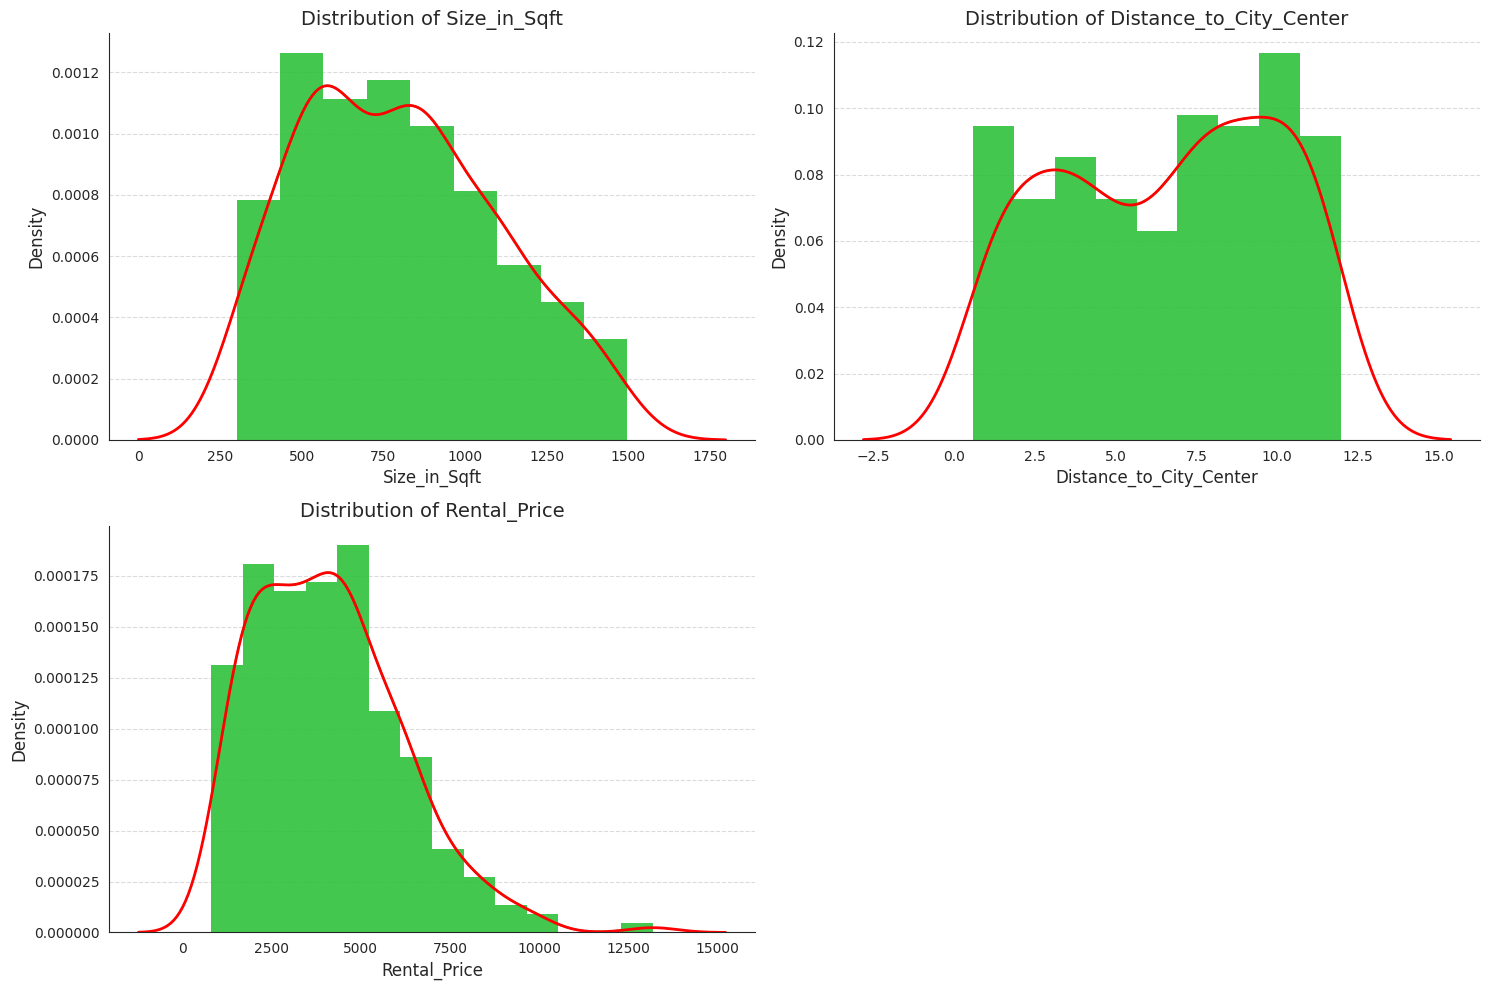

In [ ]:
numerical_features = df1.select_dtypes(include=np.number).columns

num_plots = len(numerical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

sns.set_style("white")

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df1[col], kde=True, ax=axes[i], stat="density", linewidth=0, alpha=0.9, color="#2fc13b")
    sns.kdeplot(df1[col], color="red", ax=axes[i], linewidth=2)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)

    # Improve aesthetics
    sns.despine(ax=axes[i])
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Get the data distribution of the numerical variables using Box Plot

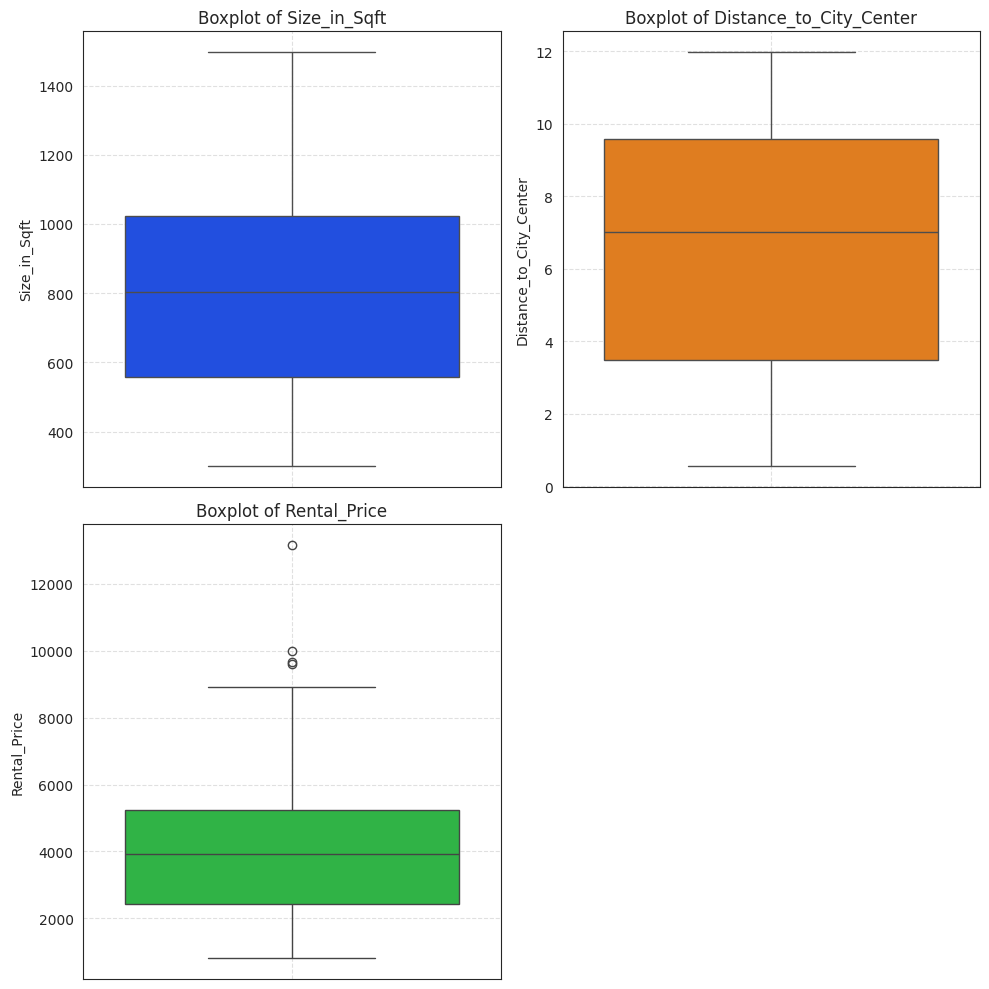

In [ ]:
# @title Default title text

numerical_features = df1.select_dtypes(include=np.number).columns

num_plots = len(numerical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("bright", num_plots)

# Loop through numerical features and plot boxplots with different colors
for i, (col, color) in enumerate(zip(numerical_features, colors)):
    sns.boxplot(y=df1[col], ax=axes[i], orient='v', color=color)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


remove all the outliers using IQR

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

numerical_cols = df1.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df2 = remove_outliers_iqr(df1, col)


After Removing the Outliers data set size

In [ ]:
df2.shape

(249, 8)

Get the Distribution of the Target Variable (Rental_Price) after removing the outliers

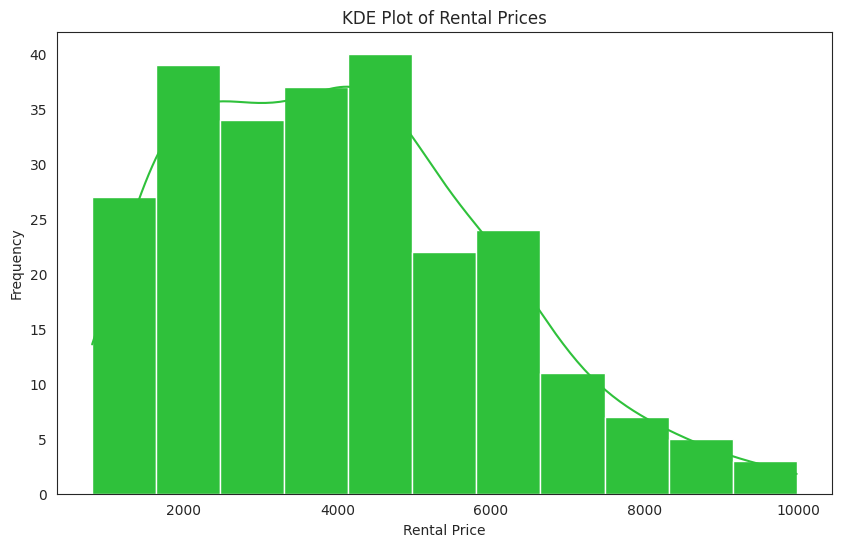

In [ ]:
sns.histplot(df2['Rental_Price'], kde=True, color="#2fc13b",alpha = 1)
sns.kdeplot(df2['Rental_Price'], color="red", ax=axes[i], linewidth=2) # KDE line color changed to red
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.title('KDE Plot of Rental Prices')
plt.show()

Get Summerized details of the numerical data after removing outliers

In [ ]:
df2.describe()

,Size_in_Sqft,Distance_to_City_Center,Rental_Price
count,249.000000,249.000000,249.000000
mean,801.228916,6.567470,4042.808941
std,303.091237,3.408717,1973.150438
min,301.000000,0.570000,804.814268
25%,559.000000,3.490000,2425.753008
50%,803.000000,7.030000,3924.101565
75%,1025.000000,9.590000,5241.786793
max,1497.000000,11.980000,9981.611756


### Bivariate Analysis

Get Numerical Variable scatter plot with a regression line aginst Rental_Price  

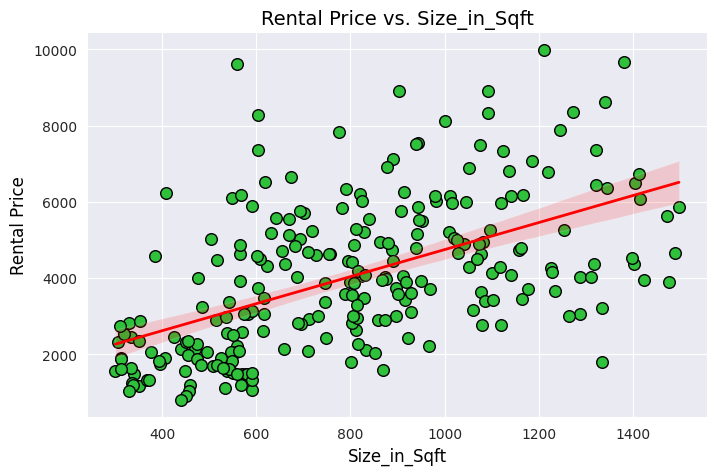

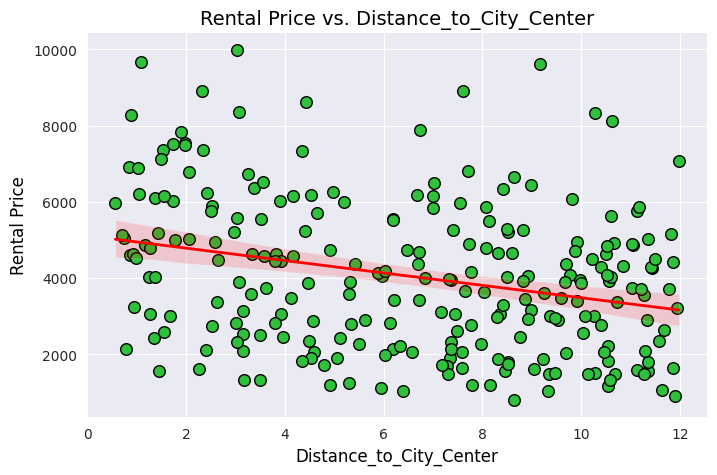

In [ ]:
numerical_features = df2.select_dtypes(include=np.number).columns

sns.set_style("darkgrid")


for col in numerical_features:
    if col != 'Rental_Price':
        plt.figure(figsize=(8, 5))


        sns.regplot(
            x=col, y='Rental_Price', data=df2,
            scatter_kws={'alpha': 1, 's': 70, 'edgecolors': 'black', 'color': '#2fc13b'},
            line_kws={'color': 'red', 'linewidth': 2}
        )


        plt.xlabel(col, fontsize=12, color='black')
        plt.ylabel('Rental Price', fontsize=12, color='black')
        plt.title(f'Rental Price vs. {col}', fontsize=14, color='black')
        plt.show()


# Categorical Variable Analysis

Get the summary of the categorical data after removing outliers

In [ ]:
df2.describe(include=['object','category'])

,Bedrooms,Bathrooms,Neighborhood,Furnished,Building_Type
count,249,249,249,249,249
unique,6,2,6,4,5
top,1,1,Midtown,Furnished,Condo
freq,91,184,64,166,87


Seeing unique values in each categorical columns

In [ ]:
df2["Bathrooms"].unique()

[2, 1]
Categories (2, int64): [1 < 2]

In [ ]:
df2["Bedrooms"].unique()

array(['1', '3', '0', '2', '4', 'O'], dtype=object)

In [ ]:
df2["Bedrooms"] = df2["Bedrooms"].replace('O', '0')
df2["Bedrooms"].unique()

array(['1', '3', '0', '2', '4'], dtype=object)

In [ ]:
df2["Neighborhood"].unique()

array(['Uptown', 'Suburbs', 'Downtown', 'uptown', 'Midtown', 'suburbs'],
      dtype=object)

In [ ]:
df2["Neighborhood"] = df2["Neighborhood"].replace({'uptown': 'Uptown', 'suburbs': 'Suburbs'})
df2["Neighborhood"].unique()

array(['Uptown', 'Suburbs', 'Downtown', 'Midtown'], dtype=object)

In [ ]:
df2["Furnished"].unique()

array(['Furnished', 'Unfurnished', 'unfurnished', 'furnished'],
      dtype=object)

In [ ]:
df2["Furnished"] = df2["Furnished"].replace({'unfurnished': 'Unfurnished', 'furnished': 'Furnished'})
df2["Furnished"].unique()

array(['Furnished', 'Unfurnished'], dtype=object)

In [ ]:
df2["Building_Type"].unique()

array(['Apartment', 'Condo', 'Studio', 'apartment', 'condo'], dtype=object)

In [ ]:
df2["Building_Type"] = df2["Building_Type"].replace({'apartment': 'Apartment', 'condo': 'Condo'})
df2["Building_Type"].unique()

array(['Apartment', 'Condo', 'Studio'], dtype=object)

Get the Count Plot of each categorical varibles

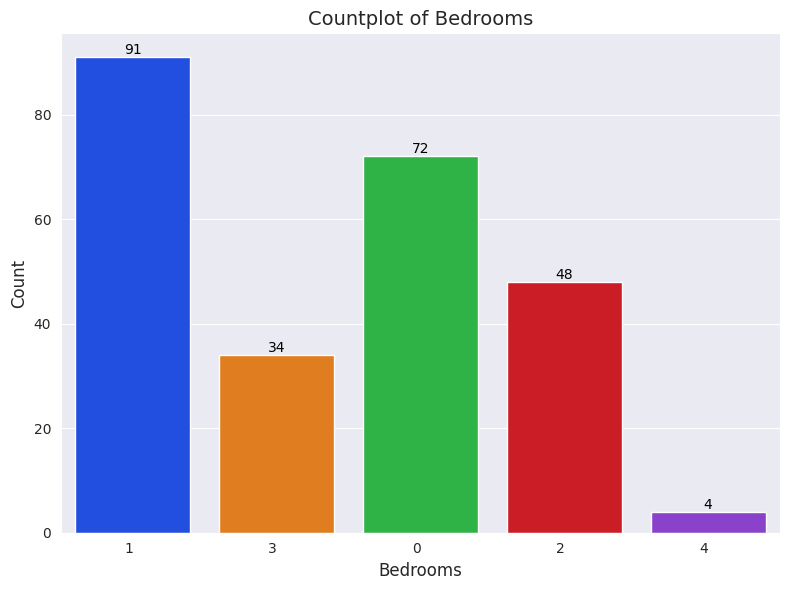

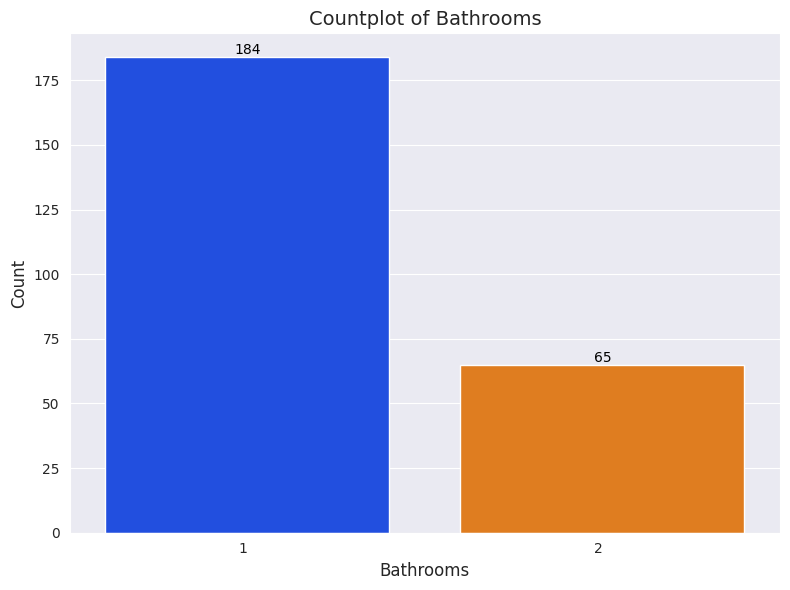

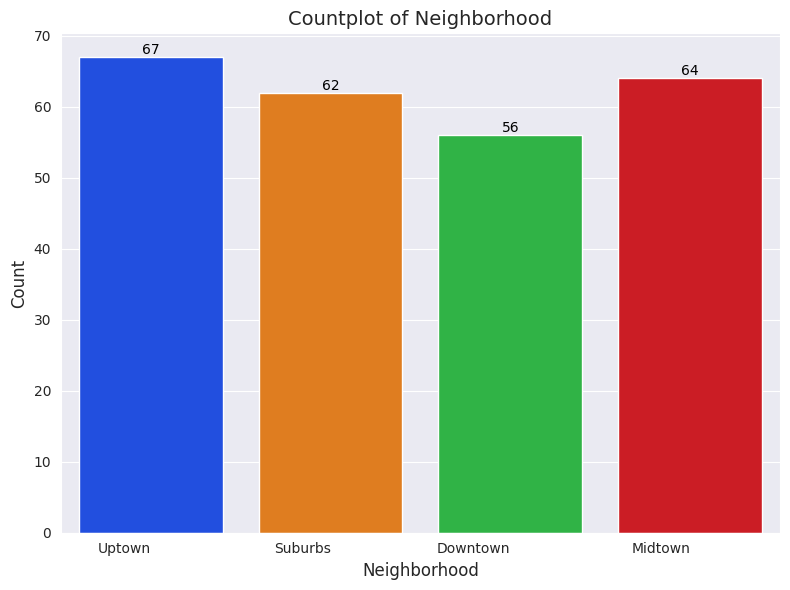

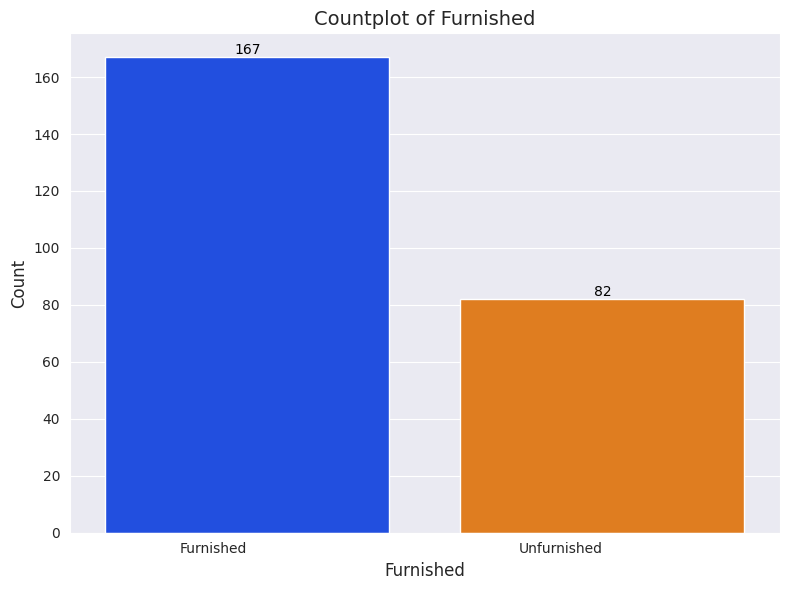

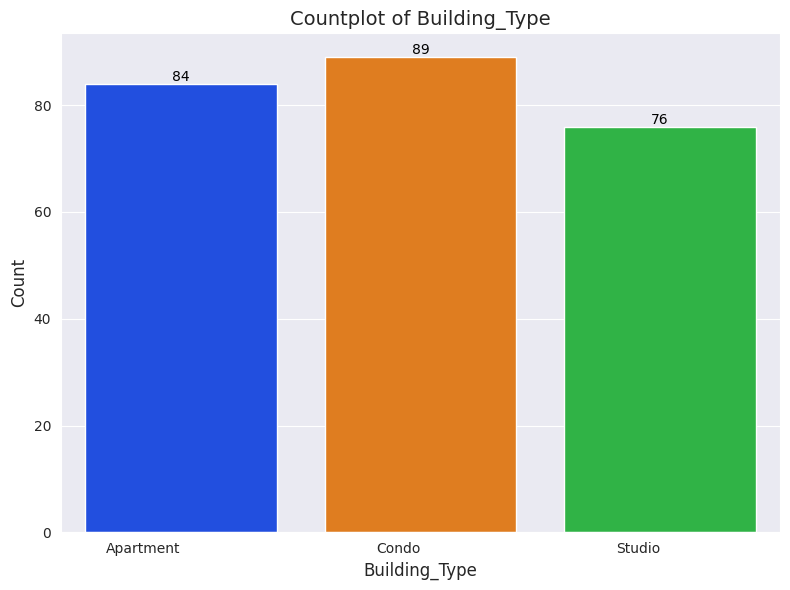

In [ ]:
categorical_features = df2.select_dtypes(include=['object','category']).columns

for col in categorical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    ax = sns.countplot(x=col, data=df2, palette="bright") # Using viridis color palette
    plt.title(f'Countplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Add numerical values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xticks(ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


Get the Box Plot for each categorical variable against Rental_Price

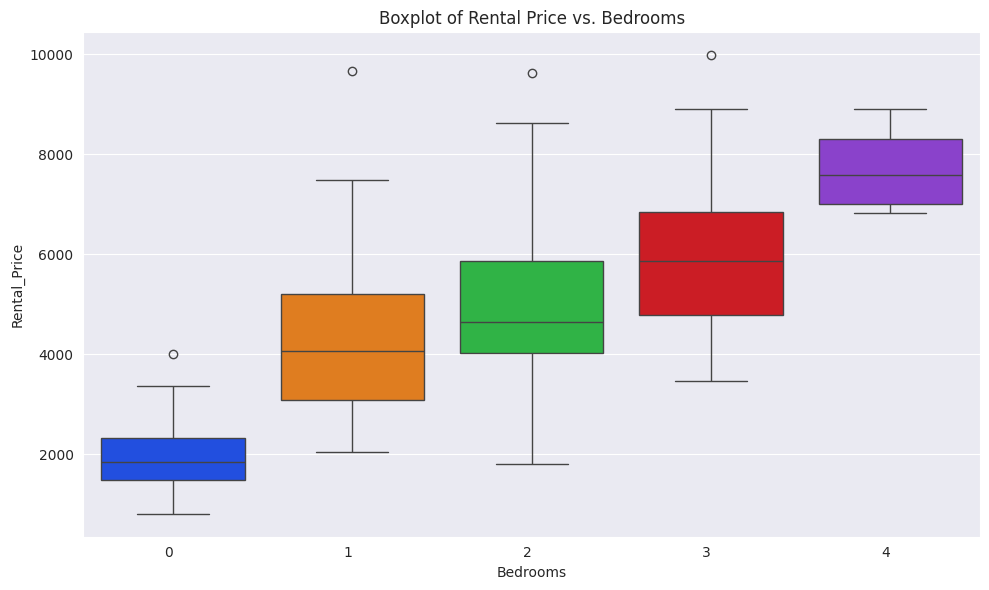

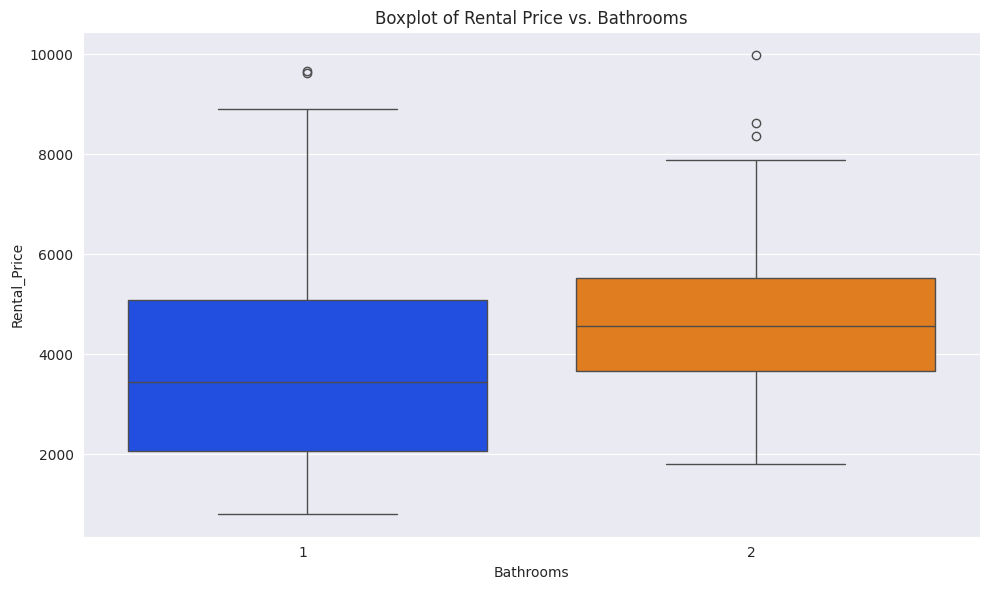

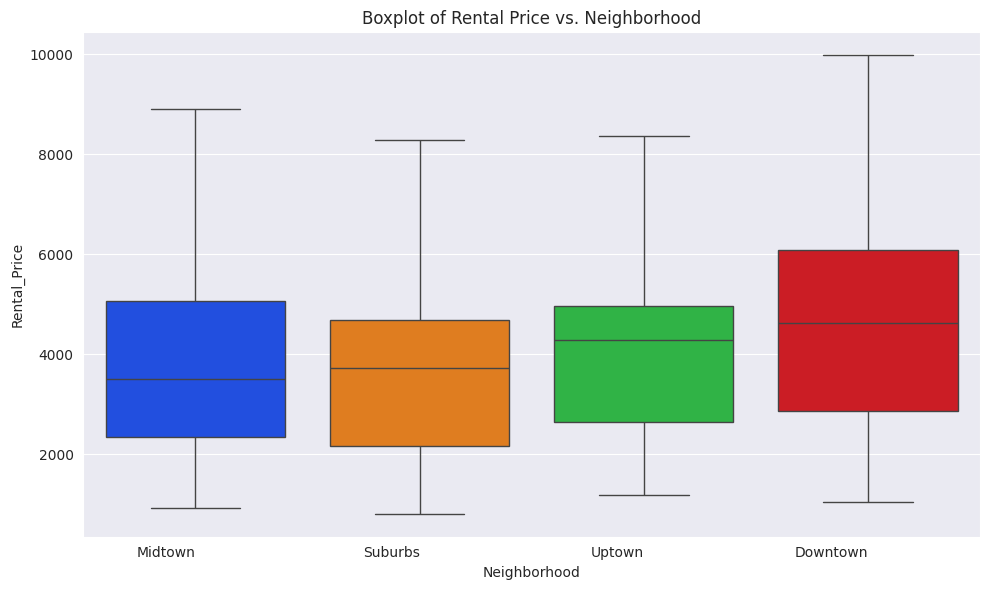

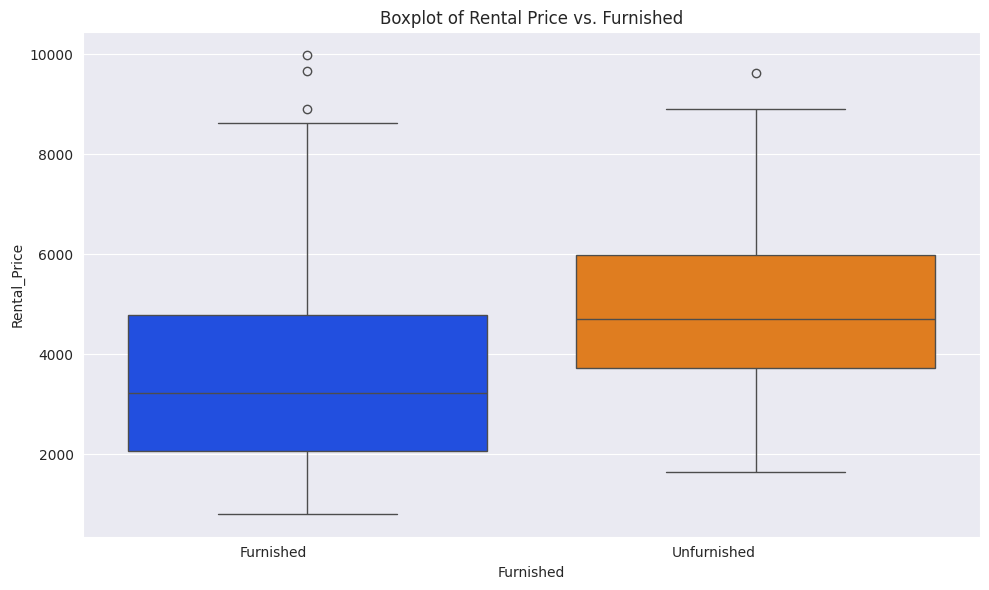

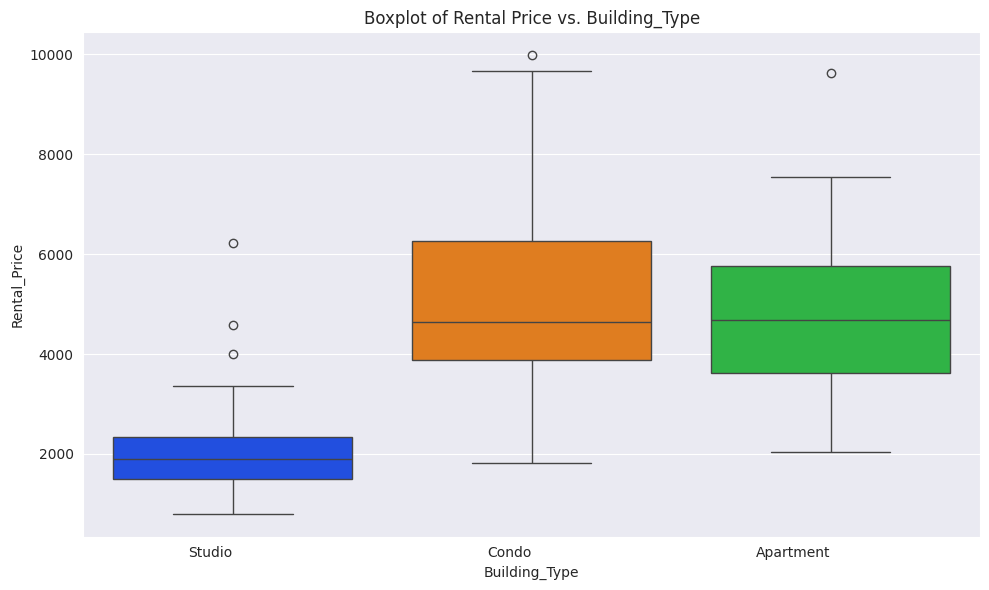

In [ ]:
import matplotlib.pyplot as plt
categorical_features = df2.select_dtypes(include=['object','category']).columns

for col in categorical_features:
    # plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Rental_Price', data=df2, palette="bright",order=df2.groupby(col)['Rental_Price'].median().sort_values().index)
    plt.title(f'Boxplot of Rental Price vs. {col}')
    plt.xticks(ha='right')
    plt.tight_layout()
    plt.show()


# Correlation Analysis

Get Pair Plot

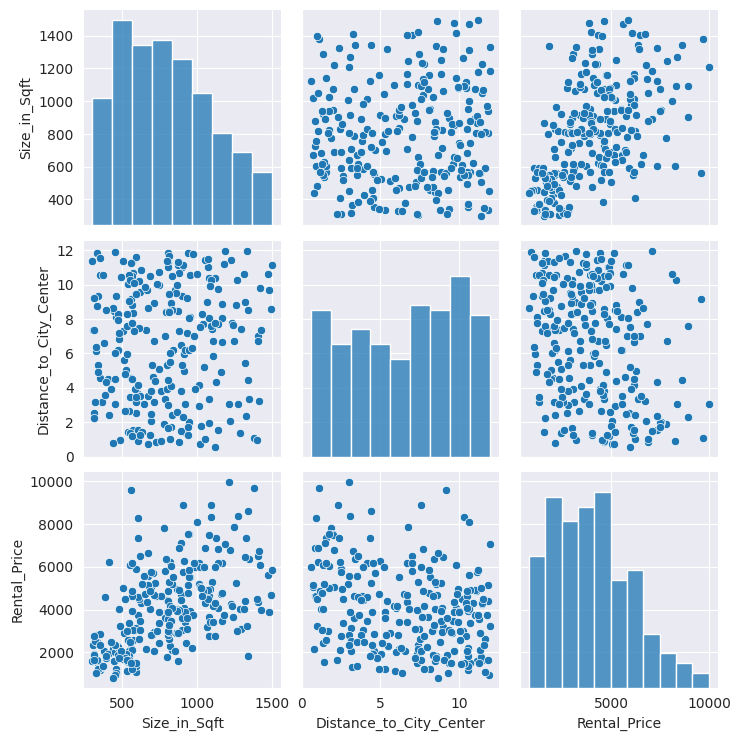

In [ ]:
sns.pairplot(df2)
plt.show()

Correlation matrix

In [ ]:
df3 = df1.select_dtypes(include=np.number)
correlation_matrix = df3.corr()
print(correlation_matrix)


                         Size_in_Sqft  Distance_to_City_Center  Rental_Price
Size_in_Sqft                 1.000000                 0.050743      0.519072
Distance_to_City_Center      0.050743                 1.000000     -0.286753
Rental_Price                 0.519072                -0.286753      1.000000


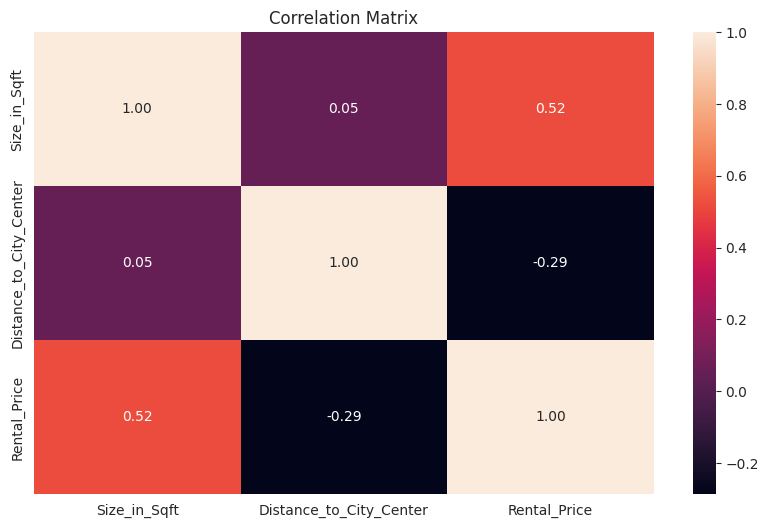

In [ ]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Get the Categorical variable with Mean, Median, Count aginst Rental_Price

In [ ]:
df2.groupby('Neighborhood').agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=('Rental_Price', 'mean'), ascending=False)


Rental_Price                   
                     mean       median count
Neighborhood                                
Downtown      4617.087753  4627.887134    56
Uptown        4008.781321  4283.123155    67
Midtown       3863.167340  3511.760501    64
Suburbs       3746.313770  3731.450596    62

In [ ]:
df2.groupby('Building_Type').agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=('Rental_Price', 'mean'), ascending=False)

Rental_Price                   
                      mean       median count
Building_Type                                
Condo          5101.762888  4638.001397    89
Apartment      4731.554540  4673.517813    84
Studio         2041.472999  1892.144516    76

In [ ]:
df2.groupby('Bedrooms').agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=('Rental_Price', 'mean'), ascending=False)

Rental_Price                   
                 mean       median count
Bedrooms                                
4         7726.303056  7590.371799     4
3         5950.691543  5863.297444    34
2         4968.135943  4638.997465    48
1         4346.235754  4052.888953    91
0         1936.843370  1848.679372    72

In [ ]:
df2.groupby('Bathrooms').agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=('Rental_Price', 'mean'), ascending=False)

Rental_Price                   
                  mean       median count
Bathrooms                                
2          4752.944521  4567.111613    65
1          3791.945828  3440.773533   184

In [ ]:
df2.groupby('Furnished').agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=('Rental_Price', 'mean'), ascending=False)

Rental_Price                   
                    mean       median count
Furnished                                  
Unfurnished  4817.971657  4708.269920    82
Furnished    3662.190122  3230.587715   167

In [ ]:
df_agg = df2.groupby(['Furnished', 'Building_Type', 'Bathrooms']).agg({
    'Rental_Price': ['mean', 'median', 'count']
}).sort_values(by=['Furnished', 'Building_Type', ('Rental_Price', 'mean')], ascending=[False, False, False])

df_agg


Rental_Price                   
                                            mean       median count
Furnished   Building_Type Bathrooms                                
Unfurnished Studio        1          2485.492453  2226.115295     8
                          2                  NaN          NaN     0
            Condo         1          5920.827827  6141.885721    14
                          2          5006.321698  5006.321698     2
            Apartment     1          5196.698024  4976.056448    32
                          2          4461.198711  4603.525930    26
Furnished   Studio        1          1989.235416  1848.679372    68
                          2                  NaN          NaN     0
            Condo         2          5242.573944  4587.442388    26
                          1          4783.951946  4263.365591    47
            Apartment     1          4568.961111  4444.617619    15
                          2          4239.151039  4073.274042    11